<a href="https://colab.research.google.com/github/a-winders/MLA_ATW/blob/main/MLA1_ATW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 1
# Adam Winders 
# CS430-ON 
# Machine Learning in the Cloud 


<br>
<br>
<br>


# Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Connect to Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Importing data frame

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Bellarmine/CS430/weather_2012.csv')

# Displaying Rows
<br> Displays the first five rows

In [4]:
# default number returned is 5
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


<br> Displays the last five rows

In [5]:
# default number returned is 5
df.tail()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,2012-12-31 23:00:00,0.0,-2.1,86,30,11.3,99.89,Snow


<br> Displays five random rows

In [6]:
# returns 5 random rows
df.sample(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
7775,2012-11-19 23:00:00,-0.7,-2.2,90,6,9.7,102.16,Fog
6066,2012-09-09 18:00:00,15.5,8.6,63,11,48.3,100.80,Mostly Cloudy
3799,2012-06-07 07:00:00,13.9,8.4,69,4,24.1,101.13,Mainly Clear
8365,2012-12-14 13:00:00,3.3,-1.2,72,22,24.1,101.33,Mostly Cloudy
177,2012-01-08 09:00:00,-6.4,-11.9,65,17,24.1,101.81,Snow


<br> Displays all columns

In [7]:
# sets the max number of columns to none
pd.set_option('display.max_columns', None) 

# displays dataset
df 

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


# Renaming columns



In [8]:
# leading comma for better reading complexity
df.rename(columns=
{'Date/Time':'date_time'
,'Temp (C)':'temp_c'
,'Dew Point Temp (C)':'dew_point'
,'Rel Hum (%)':'relative_humidity'
,'Wind Spd (km/h)':'wind_speed'
,'Visibility (km)':'visibility'
,'Stn Press (kPa)': 'pressure'
,'Weather':'weather'
}, inplace = True)

# displays all renamed columns
df

,date_time,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


# Numerical Data


In [10]:
# returns standard stats for each column (count, mean, etc.)
df.describe()

,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


# Temperature


In [11]:
# displays current data in column  temp_c
df['temp_c']

0      -1.8
1      -1.8
2      -1.8
3      -1.5
4      -1.5
       ... 
8779    0.1
8780    0.2
8781   -0.5
8782   -0.2
8783    0.0
Name: temp_c, Length: 8784, dtype: float64

In [13]:
# adds column temp_f with converted data from column data_c
df["temp_f"] = df.apply(lambda x: (9/5)*x['temp_c']+32, axis=1)
df = df.reindex(columns=['date_time','temp_f','temp_c','dew point','relative_humidity','wind_speed','visibility','pressure','weather'])

In [14]:
# puts all columns in a list and prints
cols = df.columns.tolist()
cols

['date_time',
 'temp_f',
 'temp_c',
 'dew point',
 'relative_humidity',
 'wind_speed',
 'visibility',
 'pressure',
 'weather']

In [15]:
# returns average temperature for each month
#monthly_avg = df['temp_f'].groupby(df['date_time']).mean()
monthly_avg = df.groupby(pd.PeriodIndex(df['date_time'], freq="M")) ['temp_f'].mean()

In [16]:
# prints Series called monthly_avg
monthly_avg

date_time
2012-01    18.731290
2012-02    24.395000
2012-03    37.618226
2012-04    44.616750
2012-05    61.227984
2012-06    68.241250
2012-07    73.022097
2012-08    72.102742
2012-09    61.672000
2012-10    51.718952
2012-11    33.676500
2012-12    26.048629
Freq: M, Name: temp_f, dtype: float64

# Types of Data

In [17]:
# displays data types of all columns
df.dtypes

date_time             object
temp_f               float64
temp_c               float64
dew point            float64
relative_humidity      int64
wind_speed             int64
visibility           float64
pressure             float64
weather               object
dtype: object

# Date/Time

In [18]:
# displays data from column date_time before conversion
df.date_time

0       2012-01-01 00:00:00
1       2012-01-01 01:00:00
2       2012-01-01 02:00:00
3       2012-01-01 03:00:00
4       2012-01-01 04:00:00
               ...         
8779    2012-12-31 19:00:00
8780    2012-12-31 20:00:00
8781    2012-12-31 21:00:00
8782    2012-12-31 22:00:00
8783    2012-12-31 23:00:00
Name: date_time, Length: 8784, dtype: object

In [19]:
# converts data in date_time column to date/time
df.date_time=pd.to_datetime(df.date_time)

In [20]:
# verifies that the data type for date_time has been changed to date/time
df.date_time.dtype

dtype('<M8[ns]')

In [21]:
# displays date from date_time after conversion
df.date_time

0      2012-01-01 00:00:00
1      2012-01-01 01:00:00
2      2012-01-01 02:00:00
3      2012-01-01 03:00:00
4      2012-01-01 04:00:00
               ...        
8779   2012-12-31 19:00:00
8780   2012-12-31 20:00:00
8781   2012-12-31 21:00:00
8782   2012-12-31 22:00:00
8783   2012-12-31 23:00:00
Name: date_time, Length: 8784, dtype: datetime64[ns]

# Visualizing Data
Scatter plot

<AxesSubplot:title={'center':'Temperature vs. Relative Humidity'}, xlabel='Temperature (F)', ylabel='Relative Humidity'>

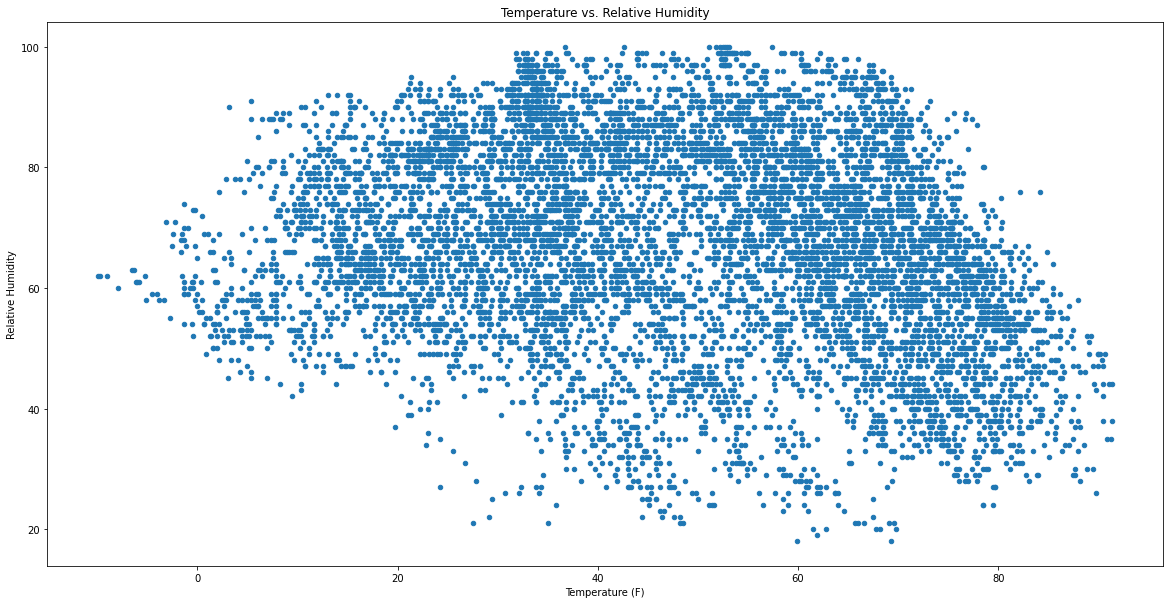

In [22]:
# Generates scatter plot that compares temperature against relative humidity
# Size of the graph is 20 x 10
df.plot(kind='scatter',x='temp_f',xlabel='Temperature (F)',y='relative_humidity',ylabel='Relative Humidity',title="Temperature vs. Relative Humidity",figsize=(20,10))

Line chart

'df.plot(x="date_time",y="temp_f")\nplt.xlabel("Month",size=20)\nplt.ylabel("Temperature (F)",size=10)'

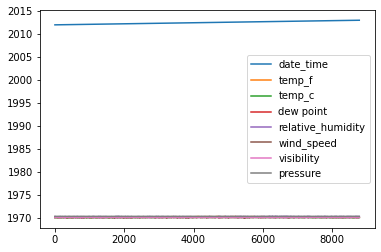

In [41]:
# Generates line chart that shows average temperature (F) per month
# Size of the graph is 20 x 10
#df.plot(kind = 'line', x ='monthly_avg')

df.plot()

"""df.plot(x="date_time",y="temp_f")
plt.xlabel("Month",size=20)
plt.ylabel("Temperature (F)",size=10)"""

Box plot

<AxesSubplot:>

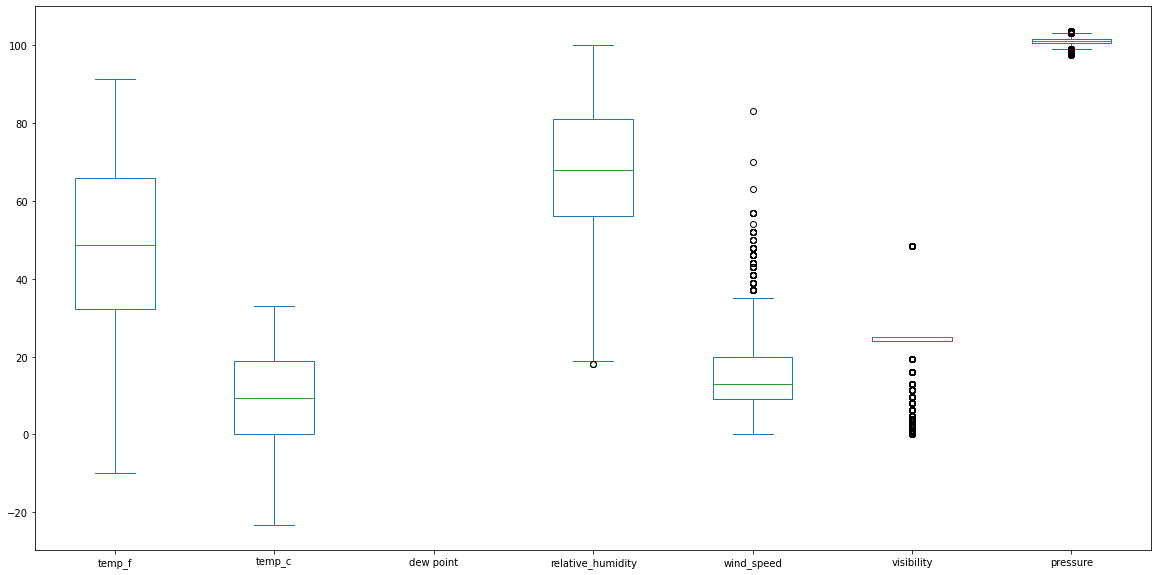

In [24]:
df.plot(kind='box',figsize=(20,10))